<a href="https://colab.research.google.com/github/Gr3gP/Active-Satellites/blob/main/Capstone_I_Active_Satellite_Research_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**


In this paper we will look at a data set containing active satellites in Earth orbit. We will look at the relationship between average dry masses of satellites in the same orbit. We will then turn our attention to the average launch mass of satellites in each orbit. 

# **Hypothesis**

H0: There is no significant difference in the average dry mass of satellites in LEO, GEO, MEO, and Elliptical Earth orbits.

Ha: There is a significant difference between the average dry mass of satellites in LEO, GEO, MEO, and Elliptical Earth orbits.

# **Data**

This data comes from  __[Kaggle](https://www.kaggle.com/ucsusa/active-satellites?select=database.csv)__ The dataset contains 1,421 toal satellites, of which 1,371 have a non-null value for dry mass which we need for our anaylsis. 


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Active Satellites in Orbit.csv to Active Satellites in Orbit.csv


In [ ]:
import io 
sat_df = pd.read_csv(io.BytesIO(uploaded['Active Satellites in Orbit.csv']))
print(sat_df)

     Official Name of Satellite  ... NORAD Number
0                      AAUSat-4  ...      41460.0
1                         ABS-2  ...      39508.0
2                        ABS-2A  ...      41588.0
3                         ABS-3  ...      24901.0
4                        ABS-3A  ...      40424.0
...                         ...  ...          ...
1415                Zhongxing 9  ...      33051.0
1416                   Zijing 1  ...      40919.0
1417               Ziyuan 1-02C  ...      38038.0
1418                   Ziyuan 3  ...      38046.0
1419                  Ziyan 3-2  ...      41556.0

[1420 rows x 26 columns]


In [ ]:
sat_df.info()

We will rename the columns we need for ease of use as shown below.

In [ ]:
sat_df = sat_df.rename(columns= {"Dry Mass (Kilograms)": "dry_mass_kg"})
sat_df = sat_df.rename(columns= {"Launch Mass (Kilograms)": "launch_mass_kg"})
sat_df = sat_df.rename(columns={"Class of Orbit": "class_orbit"})


We will also need to convert some object columns to floats for our analysis. mainly dry_mass_kg and launch_mass_kg as shown below.

In [ ]:
sat_df["dry_mass_kg"] = pd.to_numeric(sat_df.dry_mass_kg, errors='coerce')
sat_df["launch_mass_kg"] = pd.to_numeric(sat_df.launch_mass_kg, errors='coerce')

sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1420 non-null   object 
 1   Country/Organization of UN Registry          1420 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1420 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   class_orbit                                  1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

## **Methods**  

For this analysis we are going to clean the data first, then create 4 data frames containing data for class of orbit. Afer we will get the descriptive stats for the dataframes and inspect the histograms for normality, skewness, and kurtosis to determine whther we can test our hypothesis using parametric or non-parametric tests.

In [ ]:
sat_df.groupby(['class_orbit']).agg('count')

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),Apogee (Kilometers),Eccentricity,Inclination (Degrees),Period (Minutes),launch_mass_kg,dry_mass_kg,Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
class_orbit,,,,,,,,,,,,,,,,,,,,,,,,,
Elliptical,37,37,37,37,37,37,11,24,37,37,37,37,37,37,33,12,12,37,22,37,37,37,37,37,37
GEO,506,506,506,506,506,506,41,0,493,506,506,506,506,504,488,245,276,506,439,506,506,506,506,506,506
LEO,779,779,779,779,779,779,315,778,775,779,779,779,779,779,695,186,291,776,431,779,779,779,779,779,779
LEO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
MEO,96,96,96,96,96,96,1,96,96,96,96,96,96,96,95,18,70,96,83,96,96,96,96,96,96


In [ ]:
sat_df['class_orbit'].unique()

array(['LEO', 'GEO', 'MEO', 'Elliptical', nan, 'LEO '], dtype=object)

Now that we've made our adjustments, we can begin investigating the data. A tables been created above grouping satellites by their orbit. We can see we have an issue with the LEO orbit not grouping completely. After a bit of investigation we can see that group has no dry_mass_kg values and we can ignore it since it will have no impact on our analysis.

Below we are creating a DataFrame for each respective orbit class. 

In [ ]:
LEO_sat_df = sat_df[(sat_df['class_orbit'] == 'LEO')]
MEO_sat_df = sat_df[(sat_df['class_orbit'] == 'MEO')]
GEO_sat_df = sat_df[(sat_df['class_orbit'] == 'GEO')]
EEO_sat_df = sat_df[(sat_df['class_orbit'] == 'Elliptical')]

Now that we have our data parsed and in DataFrames. we can begin our analyssis. We have ran the descriptive statistics for each orbit class with  counts, minimums, maximums, and means displayed below.

In [ ]:
LEO_sat_df['dry_mass_kg'].describe()

count      186.000000
mean       619.575269
std       1307.773849
min          1.000000
25%         53.500000
50%        556.000000
75%        556.000000
max      10000.000000
Name: dry_mass_kg, dtype: float64

In [ ]:
MEO_sat_df['dry_mass_kg'].describe()

count     18.000000
mean     944.444444
std      103.481867
min      660.000000
25%      980.000000
50%      980.000000
75%      980.000000
max      980.000000
Name: dry_mass_kg, dtype: float64

In [ ]:
GEO_sat_df['dry_mass_kg'].describe()

count     245.000000
mean     1820.481633
std       872.338390
min       320.000000
25%      1272.000000
50%      1669.000000
75%      2275.000000
max      5624.000000
Name: dry_mass_kg, dtype: float64

In [ ]:
EEO_sat_df['dry_mass_kg'].describe()

count      12.000000
mean     1125.000000
std      1177.308487
min        77.000000
25%       377.750000
50%       478.000000
75%      1570.000000
max      3414.000000
Name: dry_mass_kg, dtype: float64

The sample sizes(counts) for LEO(186) and GEO(245) seem to be large enough but MEO(18) and EEO(12) are quite a bit smaller. We will continue with the planned analysis, but may want to rerun it with just LEO and GEO or even change the dry_mass_kg variable to launch_mass_kg since we have larger samples for all the orbits; LEO(695), GEO(488), MEO(95), EEO(33). This does however go beyond the scope of this analysis. 

Below we can see histograms of dry_mass_kg for each class_orbit. We will once again ignore the empty LEO histogram. We can see that the only seemingly normally distributed class_orbit is GEO. The rest are quite sporadic and it may not be useful to perform a t-test with. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b7cb810b8>,
      dtype=object)

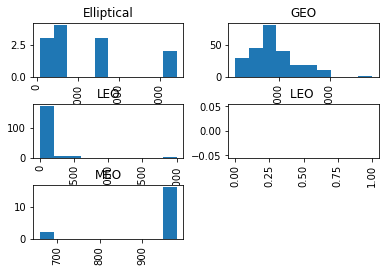

In [ ]:
sat_df['dry_mass_kg'].hist(by = sat_df['class_orbit'])

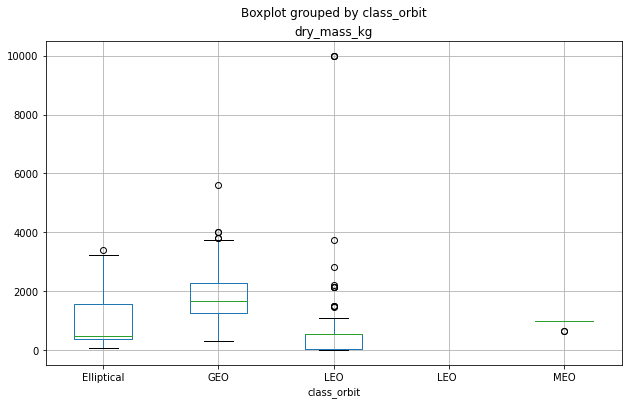

In [ ]:
sat_df.boxplot('dry_mass_kg', by='class_orbit', figsize=(10, 6))

It would appear the only normally distributed class orbit is GEO. This means we will be using non-parametric tests for our analysis. The other class orbits are clearly not normally distributed. The boxplot reinforces this and even when we look at the GEO data, it appears to be less normal than the histogram showed.

In [ ]:
print(stats.describe(EEO_sat_df.isnull()['dry_mass_kg']))
print(stats.describe(LEO_sat_df.isnull()['dry_mass_kg']))
print(stats.describe(GEO_sat_df.isnull()['dry_mass_kg']))
print(stats.describe(MEO_sat_df.isnull()['dry_mass_kg']))

DescribeResult(nobs=37, minmax=(False, True), mean=0.6756756756756757, variance=0.2252252252252252, skewness=-0.7505553499465135, kurtosis=-1.4366666666666663)
DescribeResult(nobs=779, minmax=(False, True), mean=0.7612323491655969, variance=0.18199128142005272, skewness=-1.2254923101355262, kurtosis=-0.49816859779869116)
DescribeResult(nobs=506, minmax=(False, True), mean=0.5158102766798419, variance=0.25024458967635893, skewness=-0.0632727465552306, kurtosis=-1.9959965595433575)
DescribeResult(nobs=96, minmax=(False, True), mean=0.8125, variance=0.15394736842105264, skewness=-1.6012815380508714, kurtosis=0.5641025641025643)


Looking at the above Kurtosis and Skewness for our variables, they all technically fall within the threhold between -3 and 3. I am still going to continue testing our dataset with non-parametric tests however, because I beleive they will be more accurate.

Next, we will test this belief with the Shapiro-Wilkes test. 

In [ ]:
stats.shapiro(GEO_sat_df.isnull()['dry_mass_kg'])

(0.6361855268478394, 2.3780481114027637e-31)

In [ ]:
stats.shapiro(LEO_sat_df.isnull()['dry_mass_kg'])

(0.5286370515823364, 3.026804682941605e-41)

In [ ]:
stats.shapiro(MEO_sat_df.isnull()['dry_mass_kg'])

(0.4753774404525757, 6.931037673321445e-17)

In [ ]:
stats.shapiro(EEO_sat_df.isnull()['dry_mass_kg'])

(0.5910291075706482, 5.863634466862777e-09)

Looking at the Shapiro-WIlkes test results, the p-values checkout, but the W values are not very close to  one. Based on this, we are going to assume we have non-normally distributed data. We will now use the Kruskal-Wallis test to test for a significant difference between our data. 

In [ ]:
stats.kruskal(GEO_sat_df.isnull()['dry_mass_kg'], MEO_sat_df.isnull()['dry_mass_kg'], EEO_sat_df.isnull()['dry_mass_kg'], LEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=93.04861270554636, pvalue=4.848862517038874e-20)

The test is telling us there is a significant difference between the dry masses. But which? Next, we will run pairwie Kruskal Wallis test to indentify which orbits dry mass is significantly different. 

In [ ]:
stats.kruskal(GEO_sat_df.isnull()['dry_mass_kg'], MEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=28.823438067527835, pvalue=7.92858074532188e-08)

In [ ]:
stats.kruskal(GEO_sat_df.isnull()['dry_mass_kg'], LEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=82.82188216863007, pvalue=8.97904571334988e-20)

In [ ]:
stats.kruskal(GEO_sat_df.isnull()['dry_mass_kg'], EEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=3.528266026005303, pvalue=0.060330851534126026)

In [ ]:
stats.kruskal(LEO_sat_df.isnull()['dry_mass_kg'], MEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=1.2550304744415668, pvalue=0.26259385439956384)

In [ ]:
stats.kruskal(LEO_sat_df.isnull()['dry_mass_kg'], EEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=1.405241303106088, pvalue=0.23584797313654549)

In [ ]:
stats.kruskal(EEO_sat_df.isnull()['dry_mass_kg'], MEO_sat_df.isnull()['dry_mass_kg'])

KruskalResult(statistic=2.84063237995278, pvalue=0.09190803642963134)

Looking at the above test statistic, it appears we can reject our null-hypothesis based on the p-value and that GEO is the odd one out. 

# **Results**

Looking at our data and the above Kruskal-Wallis test based on a p-value of .01, it appears that there is a significant difference between the the dry masses of satellites in different orbits. 


# **Recommendations**

After performing this anaylsis, it may be intereting to run it again using launch mass since the sample sizes are larger. It may yield some cleaner results, but it really depends on what question we are trying to answer. It would also be logical to continue this analysis as a time series analysis looking at how satellites' dry masses in a particular orbit have significantly changed over time. 